# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [1]:
!pip install wandb -q
!pip3 install torchmetrics -q


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [2]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: oleggikk (deep_learning_t). Use `wandb login --relogin` to force relogin


True

In [3]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch import optim
import torchmetrics
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm

import requests

In [4]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [ ]:
url = "https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1"
response = requests.get(url)
with open("dataset.zip", "wb") as file:
    file.write(response.content)

In [ ]:
import zipfile

zip_file = "dataset.zip"
extract_path = r"C:\Users\Oleg\Desktop\DL"

# Создайте объект ZipFile и извлеките файлы.
with zipfile.ZipFile(zip_file, "r") as zip_ref:
    zip_ref.extractall(extract_path)

In [16]:
# !wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True) 

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели. 
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать: 

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали. 
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [5]:
seed_everything(1)
use_cuda = torch.cuda.is_available()
device = 'cuda' if use_cuda else 'cpu'
kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
batch_size = 64
print(use_cuda)

True


In [12]:
# YOU CAN DEFINE AUGMENTATIONS HERE
# https://pytorch.org/vision/main/transforms.html - Аугментация по инструкции из документации torch

TRAIN_PATH = r"C:\Users\Oleg\Desktop\DL\dataset\dataset\train"
VAL_PATH = r"C:\Users\Oleg\Desktop\DL\dataset\dataset\val"

train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]
)
val_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]
)

train_dataset = ImageFolder(TRAIN_PATH, transform=train_transform)
val_dataset = ImageFolder(VAL_PATH, transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
    
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, **kwargs)

In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

### Посмотрим на картиночки

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


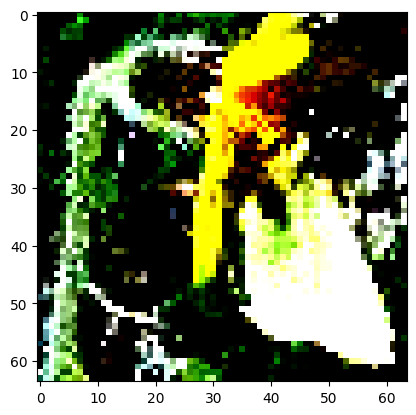

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


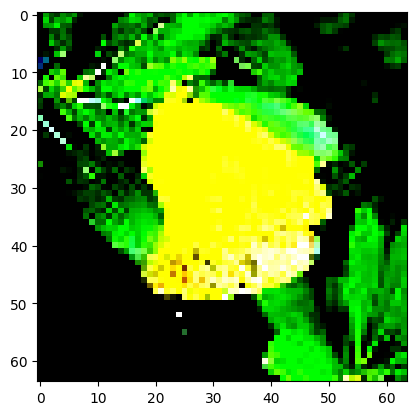

In [10]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1. 

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

### Тренировочный класс lightning

In [6]:
# https://lightning.ai/docs/pytorch/stable/common/lightning_module.html
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate, loss_function):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.loss_function = loss_function

    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        optimizer = optim.Adam(filter(lambda p: p.requires_grad, self.model.parameters()), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        images = images.to(device)
        output = self.model(images)
        preds, loss, acc = self._get_preds_loss_accuracy(train_batch)
        
        wandb.log({"train_loss": loss})
        wandb.log({"train_accuracy": acc})
        self.log("train_loss", loss, prog_bar=True)
        self.log("train_accuracy", acc, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        images = images.to(device)
        outputs = self.model(images)
        preds, loss, acc = self._get_preds_loss_accuracy(val_batch)
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_accuracy", acc, prog_bar=True)
        return loss, acc
    
    def _get_preds_loss_accuracy(self, batch): # https://docs.wandb.ai/guides/integrations/lightning
        '''convenience function since train/valid/test steps are similar'''
        images, target = batch
        images = images.to(device)
        target = target.to(device)
        logits = self.model(images)
        preds = torch.argmax(logits, dim=1)
        loss = self.loss_function(logits, target)
        acc = torchmetrics.functional.accuracy(preds, target, task="multiclass", num_classes = 200)
        return preds, loss, acc

In [7]:
# функцию редачил, тк у resnet нет атрибута гет аккураси
def evaluate_task(model, test_dataloader, device="cuda:0"): 
    model = model.to(device)
    model.eval()
    acc = 0.0
    preds_true = 0
    test_loader_len = 0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            logits = model(images)
            _, preds = torch.max(logits, 1)
            
            preds_true += (preds == labels).sum().item()
            test_loader_len += labels.size(0)

    acc = preds_true / test_loader_len
    model.train()
    return acc

In [8]:
from torch.nn import CrossEntropyLoss
epochs = 10
lr = 0.01
loss_function = CrossEntropyLoss()

In [11]:
wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
# device = объявил ранее

model = torchvision.models.resnet50(weights=None, num_classes=200).to(device) 
# https://pytorch.org/vision/0.9/models.html выбирал на основе этих данных
# https://arxiv.org/abs/1512.03385 подробнее про архитектуру



In [11]:
trainer = pl.Trainer(logger=wandb_logger, max_epochs=epochs, accelerator="gpu")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [12]:
module = YourModule(model, lr, loss_function).to(device)

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [13]:
trainer.fit(module, train_dataloaders = train_dataloader, val_dataloaders = val_dataloader) 

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | ResNet           | 23.9 M
1 | loss_function | CrossEntropyLoss | 0     
---------------------------------------------------
23.9 M    Trainable params
0         Non-trainable params
23.9 M    Total params
95.671    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [12]:
PATH_resnet50_1 = r'C:\Users\Oleg\Desktop\DL\models\resnet50_CELoss_10Epchs_001lr.pth'

In [14]:
# torch.save(model.state_dict(), PATH_resnet50_1) коммент чтоб случайно не нажать и не сохранить пустую модель

In [27]:
model_resnet50 = torchvision.models.resnet50(weights=None, num_classes=200).to(device) # создаем экземпляр
model_resnet50.load_state_dict(torch.load(PATH_resnet50_1)) # загружаем веса

<All keys matched successfully>

In [28]:
acc = evaluate_task(model_resnet50, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * acc / 0.44, 0, 10):.2f} баллов")

100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:17<00:00,  9.19it/s]

Оценка за это задание составит 5.88 баллов


In [ ]:
# Повысил batch size до 128 делаю чуть меньше - 0,001 и продолжаю обучение еще на 10 эпохах
# До этого проводил эксперименты, где lr наоборот поднимал - модель не училась

In [12]:
seed_everything(1)
use_cuda = torch.cuda.is_available()
device = 'cuda' if use_cuda else 'cpu'
kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
batch_size = 128
print(use_cuda)

True


In [13]:
from torch.nn import CrossEntropyLoss
epochs = 10
lr = 0.001
loss_function = CrossEntropyLoss()

In [14]:
TRAIN_PATH = r"C:\Users\Oleg\Desktop\DL\dataset\dataset\train"
VAL_PATH = r"C:\Users\Oleg\Desktop\DL\dataset\dataset\val"

train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]
)
val_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]
)

train_dataset = ImageFolder(TRAIN_PATH, transform=train_transform)
val_dataset = ImageFolder(VAL_PATH, transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
    
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, **kwargs)

In [17]:
# Продолжим обучение модели еще на 10 эпохах
trainer = pl.Trainer(logger=wandb_logger, max_epochs=epochs, accelerator="gpu")
model_resnet50.train()
module = YourModule(model_resnet50, lr, loss_function).to(device)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [18]:
trainer.fit(module, train_dataloaders = train_dataloader, val_dataloaders = val_dataloader) 

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | ResNet           | 23.9 M
1 | loss_function | CrossEntropyLoss | 0     
---------------------------------------------------
23.9 M    Trainable params
0         Non-trainable params
23.9 M    Total params
95.671    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [15]:
PATH_resnet50_2 = r'C:\Users\Oleg\Desktop\DL\models\resnet50_2_CELoss_10Epchs_0001lr.pth'

In [16]:
# torch.save(model_resnet50, PATH_resnet50_2) комменчу, чтоб не обновить случайно...

In [17]:
model_resnet50_3 = torchvision.models.resnet50(weights=None, num_classes=200).to(device) # создаем экземпляр
model_resnet50_3.load_state_dict(torch.load(PATH_resnet50_2).state_dict()) # загружаем веса

<All keys matched successfully>

In [18]:
acc = evaluate_task(model_resnet50_3, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * acc / 0.44, 0, 10):.2f} баллов")

100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:22<00:00,  3.46it/s]

Оценка за это задание составит 7.46 баллов


In [ ]:
# И еще немного поучимся, lr = 0.01, batch size оставил 128

In [19]:
from torch.nn import CrossEntropyLoss
epochs = 10
lr = 0.01
loss_function = CrossEntropyLoss()

In [20]:
# Продолжим обучение модели еще на 10 эпохах
trainer = pl.Trainer(logger=wandb_logger, max_epochs=epochs, accelerator="gpu")
model_resnet50_3.train()
module = YourModule(model_resnet50_3, lr, loss_function).to(device)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [21]:
trainer.fit(module, train_dataloaders = train_dataloader, val_dataloaders = val_dataloader) 

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | ResNet           | 23.9 M
1 | loss_function | CrossEntropyLoss | 0     
---------------------------------------------------
23.9 M    Trainable params
0         Non-trainable params
23.9 M    Total params
95.671    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [15]:
PATH_resnet50_3 = r'C:\Users\Oleg\Desktop\DL\models\resnet50_3_CELoss_10Epchs_001lr.pth'

In [16]:
# torch.save(model_resnet50_3, PATH_resnet50_3) комменчу, чтоб не обновить случайно...

In [17]:
model_resnet50_4 = torchvision.models.resnet50(weights=None, num_classes=200).to(device) # создаем экземпляр
model_resnet50_4.load_state_dict(torch.load(PATH_resnet50_3).state_dict()) # загружаем веса

<All keys matched successfully>

In [18]:
acc = evaluate_task(model_resnet50_4, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * acc / 0.44, 0, 10):.2f} баллов")

100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:28<00:00,  2.81it/s]

Оценка за это задание составит 7.70 баллов


In [27]:
wandb.finish()

epoch,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇████
train_accuracy,▃▄▂▁▃▂▄▄▅▃▃▁▃▃▂▃▅▆▃▃▄▅▅▄▅▅▅▅▄▄▅▅█▆▄▆█▅▇█
train_loss,▆▆▆█▅▆▆▄▅▅▆▇▄▅▆▆▄▄▆▅▄▃▄▅▃▃▄▃▃▃▂▃▁▄▅▂▁▂▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_accuracy,▁▂▃▅▅▄▅▇▇█
val_loss,▅▃▃▂▃▃█▁▂▂
epoch,9
train_accuracy,0.40625
train_loss,2.77971
trainer/global_step,7819
val_accuracy,0.339


In [18]:
# wandb.init()

In [18]:
# И еще поучимся, lr = 0.001, 10 эпох
seed_everything(1)
from torch.nn import CrossEntropyLoss
epochs = 10
lr = 0.001
loss_function = CrossEntropyLoss()

In [19]:
# Продолжим обучение модели еще на 10 эпохах
trainer = pl.Trainer(logger=wandb_logger, max_epochs=epochs, accelerator="gpu")
model_resnet50_4.train()
module = YourModule(model_resnet50_4, lr, loss_function).to(device)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [20]:
trainer.fit(module, train_dataloaders = train_dataloader, val_dataloaders = val_dataloader) 

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | ResNet           | 23.9 M
1 | loss_function | CrossEntropyLoss | 0     
---------------------------------------------------
23.9 M    Trainable params
0         Non-trainable params
23.9 M    Total params
95.671    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [21]:
PATH_resnet50_4 = r'C:\Users\Oleg\Desktop\DL\models\resnet50_4_CELoss_10Epchs_0001lr.pth'

In [23]:
# torch.save(model_resnet50_4, PATH_resnet50_4) комменчу, чтоб не обновить случайно...

In [33]:
final_model = torchvision.models.resnet50(weights=None, num_classes=200).to(device) # создаем экземпляр
final_model.load_state_dict(torch.load(PATH_resnet50_4).state_dict()) # загружаем веса

<All keys matched successfully>

In [26]:
acc = evaluate_task(final_model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * acc / 0.44, 0, 10):.2f} баллов.")

100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:15<00:00,  5.24it/s]

Оценка за это задание составит 8.18 баллов


In [27]:
wandb.finish()

epoch,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇████
train_accuracy,▃▅▄▂▂▃▆▄▆▆▁▅▄▇▅▄▄▇▃▄▆▅▃▆▅█▅▅▇▆▄▅▅▇▅█▅▆▆▆
train_loss,▇▅▇██▅▄▆▅▄█▅▇▄▄▅▅▂▅▅▄▅▅▃▄▂▅▄▂▄▄▄▃▃▃▁▃▄▂▃
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_accuracy,▇█▆▃▄▁▄▄▂▁
val_loss,▁▂▃▃▄▆▅▆▇█
epoch,9
train_accuracy,0.5625
train_loss,1.33204
trainer/global_step,7819
val_accuracy,0.3599


In [34]:
# И еще поучимся, lr = 0.001, 1 эпоху
seed_everything(1)
from torch.nn import CrossEntropyLoss
epochs = 1
lr = 0.001
loss_function = CrossEntropyLoss()

In [35]:
wandb_logger = WandbLogger(log_model='all')

C:\Users\Oleg\anaconda3\lib\site-packages\pytorch_lightning\loggers\wandb.py:398: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(


In [36]:
# Продолжим обучение модели еще на 10 эпохах
trainer = pl.Trainer(logger=wandb_logger, max_epochs=epochs, accelerator="gpu")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [37]:
final_model.train()
module = YourModule(final_model, lr, loss_function).to(device)

In [38]:
trainer.fit(module, train_dataloaders = train_dataloader, val_dataloaders = val_dataloader) 

C:\Users\Oleg\anaconda3\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:617: UserWarning: Checkpoint directory .\lightning_logs\pnqobpbi\checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | ResNet           | 23.9 M
1 | loss_function | CrossEntropyLoss | 0     
---------------------------------------------------
23.9 M    Trainable params
0         Non-trainable params
23.9 M    Total params
95.671    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.


### Валидация результатов задания

In [ ]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    accuracy = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            loss = model(images, labels)
            acc_batch = model.get_accuracy(reset=True)
        accuracy += acc_batch
    accuracy = accuracy / len(test_dataloader)
    return accuracy

In [ ]:
model = # Подгрузить свою сохраненную модель сюда

accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * accuracy / 0.44, 0, 10):.2f} баллов")

## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Тренировочный класс lightning

In [5]:
# https://lightning.ai/docs/pytorch/stable/common/lightning_module.html
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate, loss_function):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.loss_function = loss_function

    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        optimizer = optim.Adam(filter(lambda p: p.requires_grad, self.model.parameters()), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        images = images.to(device)
        output = self.model(images)
        preds, loss, acc = self._get_preds_loss_accuracy(train_batch)
        
        wandb.log({"train_loss": loss})
        wandb.log({"train_accuracy": acc})
        self.log("train_loss", loss, prog_bar=True)
        self.log("train_accuracy", acc, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        images = images.to(device)
        outputs = self.model(images)
        preds, loss, acc = self._get_preds_loss_accuracy(val_batch)
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_accuracy", acc, prog_bar=True)
        return loss, acc
    
    def _get_preds_loss_accuracy(self, batch): # https://docs.wandb.ai/guides/integrations/lightning
        '''convenience function since train/valid/test steps are similar'''
        images, target = batch
        images = images.to(device)
        target = target.to(device)
        logits = self.model(images)
        preds = torch.argmax(logits, dim=1)
        loss = self.loss_function(logits, target)
        acc = torchmetrics.functional.accuracy(preds, target, task="multiclass", num_classes = 200)
        return preds, loss, acc

In [6]:
# функцию редачил, тк у resnet нет атрибута гет аккураси
def evaluate_task(model, test_dataloader, device="cuda:0"): 
    model = model.to(device)
    model.eval()
    acc = 0.0
    preds_true = 0
    test_loader_len = 0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            logits = model(images)
            _, preds = torch.max(logits, 1)
            
            preds_true += (preds == labels).sum().item()
            test_loader_len += labels.size(0)

    acc = preds_true / test_loader_len
    model.train()
    return acc

In [7]:
seed_everything(1)

In [7]:
use_cuda = torch.cuda.is_available()
device = 'cuda' if use_cuda else 'cpu'
kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
batch_size = 256
print(use_cuda)

True


In [8]:
# YOU CAN DEFINE AUGMENTATIONS HERE
# https://pytorch.org/vision/main/transforms.html - Аугментация по инструкции из документации torch

# Так же добавлен resize и crop 

TRAIN_PATH = r"C:\Users\Oleg\Desktop\DL\dataset\dataset\train"
VAL_PATH = r"C:\Users\Oleg\Desktop\DL\dataset\dataset\val"

train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]
)
val_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]
)

train_dataset = ImageFolder(TRAIN_PATH, transform=train_transform)
val_dataset = ImageFolder(VAL_PATH, transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
    
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, **kwargs)

In [9]:
wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning

In [12]:
feature_extractor = torchvision.models.resnet50(weights=torchvision.models.ResNet50_Weights.DEFAULT)

# removing classification (FC) layers
feature_extractor = torch.nn.Sequential(*list(feature_extractor.children())[:-2])

# замораживаем pre-trained параметры и будем обучать только голову модели
for param in feature_extractor.parameters():
    param.requires_grad = False

# для этого потрубется свобстенный классиваер, буду использовать AdaptiveAvgPool2d
# https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html

classifier = torch.nn.Sequential(
    torch.nn.AdaptiveAvgPool2d(1),
    torch.nn.Flatten(),
    torch.nn.Linear(2048, 200)
)

resnet50_pretrained = torch.nn.Sequential(
    feature_extractor,
    classifier
)

In [13]:
resnet50_pretrained

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [14]:
resnet50_pretrained = resnet50_pretrained.to(device)

In [15]:
from torch.nn import CrossEntropyLoss
epochs = 5 # ожидаю, что обучение должно произойти очень и очень быстро
lr = 0.001
loss_function = CrossEntropyLoss()

In [16]:
module = YourModule(resnet50_pretrained, lr, loss_function).to(device)

In [17]:
trainer = pl.Trainer(logger=wandb_logger, max_epochs=epochs, accelerator="gpu")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [18]:
trainer.fit(module, train_dataloaders = train_dataloader, val_dataloaders = val_dataloader) 

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | Sequential       | 23.9 M
1 | loss_function | CrossEntropyLoss | 0     
---------------------------------------------------
409 K     Trainable params
23.5 M    Non-trainable params
23.9 M    Total params
95.671    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


In [19]:
PATH_resnet50_pretrained = r'C:\Users\Oleg\Desktop\DL\models\resnet50_pretrained.pth'

In [20]:
# torch.save(resnet50_pretrained, PATH_resnet50_pretrained) комменчу, чтоб не обновить случайно...

In [21]:
resnet50_pretrained = torch.load(PATH_resnet50_pretrained) # загружаем модель

In [22]:
accuracy = evaluate_task(resnet50_pretrained, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов")

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:15<00:00,  2.66it/s]

Оценка за это задание составит 0.97 баллов


In [27]:
wandb.finish()
wandb_logger = WandbLogger(log_model='all')

epoch,▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆████████
train_accuracy,▁▄▅▅▅▅▆▆▅█▇▇▆▇▇▇▇▇██▆▆▆▇██▇▇██▇█▇██▇█▇█▆
train_loss,█▆▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▁▂▂▂▂▂▂▁▁▂▂▂▂▂▂▂▁▂▂▁▂▁▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
val_accuracy,▁▆█▇█
val_loss,█▂▁▁▁
epoch,4
train_accuracy,0.5625
train_loss,1.77647
trainer/global_step,1954
val_accuracy,0.533


In [ ]:
# Попробуем понизить lr и продолжить учиться

In [35]:
from torch.nn import CrossEntropyLoss
epochs = 2 
lr = 0.00001
loss_function = CrossEntropyLoss()

In [36]:
seed_everything(1)

In [37]:
module = YourModule(resnet50_pretrained, lr, loss_function).to(device)

In [38]:
trainer = pl.Trainer(logger=wandb_logger, max_epochs=epochs, accelerator="gpu")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [39]:
trainer.fit(module, train_dataloaders = train_dataloader, val_dataloaders = val_dataloader) 

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | Sequential       | 23.9 M
1 | loss_function | CrossEntropyLoss | 0     
---------------------------------------------------
409 K     Trainable params
23.5 M    Non-trainable params
23.9 M    Total params
95.671    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.


In [40]:
wandb.finish()

epoch,▁▁▁▁▁▁▁▁█████████
train_accuracy,▄▁▂▂▃█▃▃▆▆▅▁▆▄▂▄▃▄▃▃▄▃▂▂▃▃▃█▃▅▃▅▅▃▅▅▅▄▃▅
train_loss,▄▇▆▅▇▁▂▅▃▄▄█▂▅▆▆▅▄▆▇▅▅▆▆▆▅▆▁▃▆▅▃▅▅▄▃▄▅▄▅
trainer/global_step,▁▁▁▁▁▁▂▂▃▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇▇██
val_accuracy,█▁
val_loss,█▁
epoch,1
train_accuracy,0.5625
train_loss,1.89778
trainer/global_step,781
val_accuracy,0.5294


In [41]:
wandb_logger = WandbLogger(log_model='all')

In [ ]:
# не хочет модель учиться, будем менять архитектуру
# - значит у модели такой потенциал, попробую взять другую

In [45]:
feature_extractor = torchvision.models.swin_t(weights=torchvision.models.Swin_T_Weights.DEFAULT)

# removing classification (FC) layers
feature_extractor = torch.nn.Sequential(*list(feature_extractor.children())[:-2])

# замораживаем pre-trained параметры и будем обучать только голову модели
for param in feature_extractor.parameters():
    param.requires_grad = False

# для этого потрубется свобстенный классиваер, буду использовать AdaptiveAvgPool2d
# https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html

classifier = torch.nn.Sequential(
    torch.nn.AdaptiveAvgPool2d(1),
    torch.nn.Flatten(),
    torch.nn.Linear(768, 200)
)

swin_t = torch.nn.Sequential(
    feature_extractor,
    classifier
)

In [46]:
from torch.nn import CrossEntropyLoss
epochs = 2 
lr = 0.01
loss_function = CrossEntropyLoss()

In [47]:
module = YourModule(swin_t, lr, loss_function).to(device)

In [48]:
trainer = pl.Trainer(logger=wandb_logger, max_epochs=epochs, accelerator="gpu")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [49]:
trainer.fit(module, train_dataloaders = train_dataloader, val_dataloaders = val_dataloader) 

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | Sequential       | 27.7 M
1 | loss_function | CrossEntropyLoss | 0     
---------------------------------------------------
153 K     Trainable params
27.5 M    Non-trainable params
27.7 M    Total params
110.693   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.


In [54]:
PATH_swin_t = r'C:\Users\Oleg\Desktop\DL\models\swin_t.pth'
# torch.save(swin_t, PATH_swin_t) комменчу, чтоб не обновить случайно...

In [55]:
swin_t = torch.load(PATH_swin_t)

In [56]:
from torch.nn import CrossEntropyLoss
epochs = 2 
lr = 0.001
loss_function = CrossEntropyLoss()

In [57]:
module = YourModule(swin_t, lr, loss_function).to(device)
trainer = pl.Trainer(logger=wandb_logger, max_epochs=epochs, accelerator="gpu")
trainer.fit(module, train_dataloaders = train_dataloader, val_dataloaders = val_dataloader) 

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | Sequential       | 27.7 M
1 | loss_function | CrossEntropyLoss | 0     
---------------------------------------------------
153 K     Trainable params
27.5 M    Non-trainable params
27.7 M    Total params
110.693   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.


In [58]:
PATH_swin_t = r'C:\Users\Oleg\Desktop\DL\models\swin_t.pth'
# torch.save(swin_t, PATH_swin_t) комменчу, чтоб не обновить случайно...

In [59]:
swin_t = torch.load(PATH_swin_t)

In [60]:
accuracy = evaluate_task(swin_t, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов")


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:24<00:00,  1.66it/s]

Оценка за это задание составит 0.96 баллов


In [61]:
from torch.nn import CrossEntropyLoss
epochs = 2 
lr = 0.0001
loss_function = CrossEntropyLoss()

In [62]:
module = YourModule(swin_t, lr, loss_function).to(device)
trainer = pl.Trainer(logger=wandb_logger, max_epochs=epochs, accelerator="gpu")
trainer.fit(module, train_dataloaders = train_dataloader, val_dataloaders = val_dataloader) 

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | Sequential       | 27.7 M
1 | loss_function | CrossEntropyLoss | 0     
---------------------------------------------------
153 K     Trainable params
27.5 M    Non-trainable params
27.7 M    Total params
110.693   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.


In [8]:
PATH_swin_t = r'C:\Users\Oleg\Desktop\DL\models\swin_t.pth'
# torch.save(swin_t, PATH_swin_t) комменчу, чтоб не обновить случайно...

In [9]:
swin_t = torch.load(PATH_swin_t)

In [65]:
accuracy = evaluate_task(swin_t, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов")


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:23<00:00,  1.71it/s]

Оценка за это задание составит 1.15 баллов


In [10]:
# разморожу параметры, попробую обучить всю модель
for param in swin_t.parameters():
    param.requires_grad = True

In [11]:
from torch.nn import CrossEntropyLoss
epochs = 2 
lr = 0.01
loss_function = CrossEntropyLoss()

In [12]:
seed_everything(1)

In [13]:
use_cuda = torch.cuda.is_available()
device = 'cuda' if use_cuda else 'cpu'
kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
batch_size = 32 # иначе памяти не хватит на столько параметров
print(use_cuda)

True


In [14]:
# YOU CAN DEFINE AUGMENTATIONS HERE
# https://pytorch.org/vision/main/transforms.html - Аугментация по инструкции из документации torch

# Так же добавлен resize и crop 

TRAIN_PATH = r"C:\Users\Oleg\Desktop\DL\dataset\dataset\train"
VAL_PATH = r"C:\Users\Oleg\Desktop\DL\dataset\dataset\val"

train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]
)
val_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]
)

train_dataset = ImageFolder(TRAIN_PATH, transform=train_transform)
val_dataset = ImageFolder(VAL_PATH, transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
    
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, **kwargs)

In [15]:
wandb_logger = WandbLogger(log_model='all')

In [16]:
module = YourModule(swin_t, lr, loss_function).to(device)
trainer = pl.Trainer(logger=wandb_logger, max_epochs=epochs, accelerator="gpu")
trainer.fit(module, train_dataloaders = train_dataloader, val_dataloaders = val_dataloader) 

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | Sequential       | 27.7 M
1 | loss_function | CrossEntropyLoss | 0     
---------------------------------------------------
27.7 M    Trainable params
0         Non-trainable params
27.7 M    Total params
110.693   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

C:\Users\Oleg\anaconda3\lib\site-packages\pytorch_lightning\trainer\call.py:53: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [ ]:
wandb.finish()

In [ ]:
wandb_logger = WandbLogger(log_model='all')

In [31]:
use_cuda = torch.cuda.is_available()
device = 'cuda' if use_cuda else 'cpu'
kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
batch_size = 256
print(use_cuda)

True


In [32]:
# YOU CAN DEFINE AUGMENTATIONS HERE
# https://pytorch.org/vision/main/transforms.html - Аугментация по инструкции из документации torch

# Так же добавлен resize и crop 

TRAIN_PATH = r"C:\Users\Oleg\Desktop\DL\dataset\dataset\train"
VAL_PATH = r"C:\Users\Oleg\Desktop\DL\dataset\dataset\val"

train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]
)
val_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]
)

train_dataset = ImageFolder(TRAIN_PATH, transform=train_transform)
val_dataset = ImageFolder(VAL_PATH, transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
    
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, **kwargs)

In [33]:
from torch.nn import CrossEntropyLoss
epochs = 2 
lr = 0.001
loss_function = CrossEntropyLoss()

In [36]:
module = YourModule(resnet34_pretrained_1, lr, loss_function).to(device)
trainer = pl.Trainer(logger=wandb_logger, max_epochs=epochs, accelerator="gpu")
trainer.fit(module, train_dataloaders = train_dataloader, val_dataloaders = val_dataloader) 

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | Sequential       | 21.4 M
1 | loss_function | CrossEntropyLoss | 0     
---------------------------------------------------
102 K     Trainable params
21.3 M    Non-trainable params
21.4 M    Total params
85.549    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.


In [37]:
from torch.nn import CrossEntropyLoss
epochs = 2 
lr = 0.0001
loss_function = CrossEntropyLoss()

In [38]:
module = YourModule(resnet34_pretrained_1, lr, loss_function).to(device)
trainer = pl.Trainer(logger=wandb_logger, max_epochs=epochs, accelerator="gpu")
trainer.fit(module, train_dataloaders = train_dataloader, val_dataloaders = val_dataloader) 

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\Oleg\anaconda3\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:617: UserWarning: Checkpoint directory .\lightning_logs\dwfqfxmu\checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | Sequential       | 21.4 M
1 | loss_function | CrossEntropyLoss | 0     
---------------------------------------------------
102 K     Trainable params
21.3 M    Non-trainable params
21.4 M    Total params
85.549    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.


In [ ]:
# попрбую ресайз сделать

In [39]:
use_cuda = torch.cuda.is_available()
device = 'cuda' if use_cuda else 'cpu'
kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
batch_size = 256
print(use_cuda)

True


In [59]:
# YOU CAN DEFINE AUGMENTATIONS HERE
# https://pytorch.org/vision/main/transforms.html - Аугментация по инструкции из документации torch

# Так же добавлен resize и crop согла

TRAIN_PATH = r"C:\Users\Oleg\Desktop\DL\dataset\dataset\train"
VAL_PATH = r"C:\Users\Oleg\Desktop\DL\dataset\dataset\val"

train_transform = transforms.Compose(
    [
        transforms.Resize((32,32)),
        transforms.RandomResizedCrop(32),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]
)
val_transform = transforms.Compose(
    [
        transforms.Resize((32,32)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]
)

train_dataset = ImageFolder(TRAIN_PATH, transform=train_transform)
val_dataset = ImageFolder(VAL_PATH, transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
    
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, **kwargs)

In [60]:
wandb.finish()
wandb_logger = WandbLogger(log_model='all')

epoch,▁▁▁▁▁▁▁▁███
train_accuracy,▁▂▄▂▂▅▃▆▄▄▄▅▂▂▅▁▄▃▂▅▅▅▅▄▄▄▄▄▅▄▄▄▇▇▅▅▄▅▄█
train_loss,█▅▃▃▂▁▄▁▄▄▄▃▅▄▄▄▄▄▃▅▆▄▅▅▅▄▅▄▆▆▄▄▄▄▅▃▆▃▇█
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇███
val_accuracy,▁
val_loss,▁
epoch,1
train_accuracy,0.07812
train_loss,32.95663
trainer/global_step,499
val_accuracy,0.0786


In [8]:
model = torchvision.models.swin_t(weights=True)

C:\Users\Oleg\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Swin_T_Weights.IMAGENET1K_V1`. You can also use `weights=Swin_T_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [17]:
wandb_logger = WandbLogger(log_model='all')

In [18]:
use_cuda = torch.cuda.is_available()
device = 'cuda' if use_cuda else 'cpu'
kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
batch_size = 128
print(use_cuda)

True


In [19]:
seed_everything(1)

In [20]:
# YOU CAN DEFINE AUGMENTATIONS HERE
# https://pytorch.org/vision/main/transforms.html - Аугментация по инструкции из документации torch

# Так же добавлен resize согласно документации
# https://pytorch.org/vision/stable/models/generated/torchvision.models.swin_t.html#torchvision.models.swin_t
# Так же работал с трансформерами в рамках курсовой: 
# https://github.com/oleggikk/CW-Transformers/blob/main/training/swin%20tiny%20window7%20clean%20CW.ipynb

TRAIN_PATH = r"C:\Users\Oleg\Desktop\DL\dataset\dataset\train"
VAL_PATH = r"C:\Users\Oleg\Desktop\DL\dataset\dataset\val"

train_transform = transforms.Compose(
    [
        transforms.Resize((232,232)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]
)
val_transform = transforms.Compose(
    [
        transforms.Resize((232,232)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]
)

train_dataset = ImageFolder(TRAIN_PATH, transform=train_transform)
val_dataset = ImageFolder(VAL_PATH, transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
    
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, **kwargs)

In [21]:
feature_extractor = torchvision.models.swin_t(weights=torchvision.models.Swin_T_Weights.DEFAULT)

# removing classification (FC) layers
feature_extractor = torch.nn.Sequential(*list(feature_extractor.children())[:-2])

# замораживаем pre-trained параметры и будем обучать только голову модели
for param in feature_extractor.parameters():
    param.requires_grad = False

# для этого потрубется свобстенный классиваер, буду использовать AdaptiveAvgPool2d
# https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html

classifier = torch.nn.Sequential(
    torch.nn.AdaptiveAvgPool2d(1),
    torch.nn.Flatten(),
    torch.nn.Linear(768, 200)
)

swin_t = torch.nn.Sequential(
    feature_extractor,
    classifier
)
swin_t = swin_t.to(device)

In [22]:
from torch.nn import CrossEntropyLoss
epochs = 2
lr = 0.001
loss_function = CrossEntropyLoss()

In [23]:
module = YourModule(swin_t, lr, loss_function).to(device)
trainer = pl.Trainer(logger=wandb_logger, max_epochs=epochs, accelerator="gpu")
trainer.fit(module, train_dataloaders = train_dataloader, val_dataloaders = val_dataloader) 

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | Sequential       | 27.7 M
1 | loss_function | CrossEntropyLoss | 0     
---------------------------------------------------
153 K     Trainable params
27.5 M    Non-trainable params
27.7 M    Total params
110.693   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.


In [24]:
wandb.finish()

epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█████████████████
train_accuracy,▁▄▅▅▆▆▆▇▆▆▅▆▆▇▇▇▆▇▇▇▇▇▇▇█▇▇▇█▆▇▇▇▆▇▆▆▇█▇
train_loss,█▆▄▄▃▃▃▂▂▂▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▂▁▁▁▂▂▂▂▂▂▂▂▁▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
val_accuracy,▁█
val_loss,█▁
epoch,1
train_accuracy,0.71875
train_loss,1.01777
trainer/global_step,1563
val_accuracy,0.7686


In [25]:
PATH_swin_t = r'C:\Users\Oleg\Desktop\DL\models\swin_t_final.pth'
# torch.save(swin_t, PATH_swin_t) 

In [26]:
swin_t = torch.load(PATH_swin_t)

In [27]:
accuracy = evaluate_task(swin_t, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов")


 82%|███████████████████████████████████████████████████████████████████▍              | 65/79 [01:50<00:21,  1.54s/it]


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [02:11<00:00,  1.66s/it]

Оценка за это задание составит 7.90 баллов


In [28]:
wandb_logger = WandbLogger(log_model='all')

In [29]:
from torch.nn import CrossEntropyLoss
epochs = 1
lr = 0.005
loss_function = CrossEntropyLoss()

In [30]:
module = YourModule(swin_t, lr, loss_function).to(device)
trainer = pl.Trainer(logger=wandb_logger, max_epochs=epochs, accelerator="gpu")
trainer.fit(module, train_dataloaders = train_dataloader, val_dataloaders = val_dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | Sequential       | 27.7 M
1 | loss_function | CrossEntropyLoss | 0     
---------------------------------------------------
153 K     Trainable params
27.5 M    Non-trainable params
27.7 M    Total params
110.693   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.


In [32]:
wandb.finish()

epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_accuracy,▂▆▄▃▃▄▄▃▄▆▃▅▃▃▄▅▄▄▃▃▅▇▆▁▃▅▄▂▅▃▆▃▂▆█▅▇▂▄▄
train_loss,█▃▅▄▅▇▅█▆▃▅▅▆▄▄▃▇▇▅▇▆▅▄▇▇▅▅▆▆▇▃▃▇▄▁▃▂▆▄▇
trainer/global_step,▁▁▁▁▁▁▂▂▃▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇▇██
val_accuracy,▁
val_loss,▁
epoch,0
train_accuracy,0.5625
train_loss,1.73619
trainer/global_step,781
val_accuracy,0.7515


In [33]:
wandb_logger = WandbLogger(log_model='all')

In [34]:
swin_t = torch.load(PATH_swin_t)

In [35]:
from torch.nn import CrossEntropyLoss
epochs = 1
lr = 0.0001
loss_function = CrossEntropyLoss()

In [36]:
module = YourModule(swin_t, lr, loss_function).to(device)
trainer = pl.Trainer(logger=wandb_logger, max_epochs=epochs, accelerator="gpu")
trainer.fit(module, train_dataloaders = train_dataloader, val_dataloaders = val_dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | Sequential       | 27.7 M
1 | loss_function | CrossEntropyLoss | 0     
---------------------------------------------------
153 K     Trainable params
27.5 M    Non-trainable params
27.7 M    Total params
110.693   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.


In [37]:
wandb.finish()

epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_accuracy,▆█▂▄▅▃▇▆▃▇▂▄▂▇▁▅▃▅▇▅▂▃▂▅▅▆▇▅▆▄▅▆▆▄▅▃█▃▃▄
train_loss,▄▁▇▅▄▄▃▃▇▄▆▅▆▃▇▅▅▅▁▆▇▄▆▅▃▄▄▅▄▄▄▃▄▄▆▄▁▅██
trainer/global_step,▁▁▁▁▁▁▂▂▃▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇▇██
val_accuracy,▁
val_loss,▁
epoch,0
train_accuracy,0.5
train_loss,2.10756
trainer/global_step,781
val_accuracy,0.7755


In [38]:
PATH_swin_t = r'C:\Users\Oleg\Desktop\DL\models\swin_t_final.pth'
# torch.save(swin_t, PATH_swin_t) 

In [39]:
swin_t = torch.load(PATH_swin_t)

In [40]:
accuracy = evaluate_task(swin_t, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов")


 82%|███████████████████████████████████████████████████████████████████▍              | 65/79 [01:51<00:21,  1.55s/it]


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [02:12<00:00,  1.68s/it]

Оценка за это задание составит 8.10 баллов


### Валидация результатов задания

In [ ]:
model = # Подгрузить свою сохраненную модель сюда

accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов")

# Отчёт об экспериментах 

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

In [31]:
# 1 задание:
# выбрал resnet50 среди доступных архитектур у torchvision.models и начал эксперементировать:
# optimizer - Adam, loss_function - CrossEntropy
# Сначала выставил 10 эпох, 64 батчайз и lr = 0.01 удалось выбить точность на 5.88 балла
# Мне мало, поставил bs = 128, и уменьшил lr до 0.01 и продолжил обучение еще 10 эпох
# Стало чуть лучше, 7,46 баллов
# Вернул lr обратно на 0.01, еще поучился 10 эпох
# Точность еще чуть повысилась, оценка поднялась до 7.7
# Снова вернул lr на 0.001 и запустил обучение еще на 10 эпохах
# 8.18 достиг, дальше по графикам видно было, что началось переобучение, решил остановиться
# Так и оставил в итоге
# https://wandb.ai/deep_learning_t/lightning_logs/runs/ukfwccyz?workspace=user-oleggikk - первый запуск
# https://wandb.ai/deep_learning_t/lightning_logs/runs/5q2sz9rz?workspace=user-oleggikk - второй запуск
# https://wandb.ai/deep_learning_t/lightning_logs/runs/v4amd7ml?workspace=user-oleggikk - третий запуск
# https://wandb.ai/deep_learning_t/lightning_logs/runs/tolon8kp?workspace=user-oleggikk - четвертый запуск

# 2 задание:
# Сначала решил просто взять resnet50 с весами imagenetа и обучить последний слой/голову
# загрузил веса, 5 эпох с 0.001 lr, сначала не делал никакого ресайза
# Использовал Adaptive Pooling, очень помог он как я считаю
# В итоге получилось выбить accuracy около 0.532, ну это 0.97 балла, мне мало
# Попробовал различные комбинации гипрепараметров запуска и пришел к выводу, что наверное в данной задаче
# это потолок для этой архитектуры, тк скор выше 0.535 не поднимался, начал выбирать другую архитектуру
# Ну и тут решил на основе своих знаний в рамках курсовой на 2 курсе выбрать трансформер - swin tiny с 28 млн параметрами
# Все так же выбрал CrossEntropy и Adam, чуть чуть поэксперементировал, выбил точность на 1.15 
# Понял, что пора резайз делать - выставил 32 на 32 и crop такой же, но потерпел неудачу
# эксперимент оказался неудачным, тут пытался и разморозить все веса и учить их все, но тоже не увенчалось успехом
# в документации нашел, что оптимальные параметры - 232 для resize и 224 для crop 
# но эксперементально выяснил, что crop что-то тут в лучшую сторону не играет
# И вот спустя многие часы обучения - выбил 0.768 на валидационной выборке, а затем 0.7755 понизив lr 
# Если честно, то я запутался уже в графиках, а то что их можно наделять названиями выяснил слишком поздно

# первый запуск resnet50 - https://wandb.ai/deep_learning_t/lightning_logs/runs/aa6ncekg?workspace=user-oleggikk
# второй запуск resnet50 - https://wandb.ai/deep_learning_t/lightning_logs/runs/3h85eplk?workspace=user-oleggikk

# потерял запуски swin_t без ресайза
# один из запусков swin_t с ресайзом 32 - https://wandb.ai/deep_learning_t/lightning_logs/runs/klbw2luf?workspace=user-oleggikk

# перый запуск с swin_t с ресайзом - https://wandb.ai/deep_learning_t/lightning_logs/runs/j3ivnn7t?workspace=user-oleggikk
# второй запуск с swin_t с ресайзом - https://wandb.ai/deep_learning_t/lightning_logs/runs/3eyqtg2u?workspace=user-oleggikk
# третий запуск c swin_t с ресайзом - https://wandb.ai/deep_learning_t/lightning_logs/runs/7qc2fpzk?workspace=user-oleggikk